# 7 Statistics with NumPy
## 7_7 Histograms in NumPy part 2
### Multidimensional Histogram and how to use them


#### numpy.histogram2d(x, y, bins=10, range=None, density=None, weights=None)
- Compute the bi-dimensional histogram of two data samples.
- Ex. X = A[0]; Y = A[1]
- We can use a 2D histogram to get an idea of how the values are spread out across the plain.
- You can think about it as a histogram on top of scatter plot

#### numpy.histogramdd(sample, bins=10, range=None, density=None, weights=None)
- Compute the multidimensional histogram of some data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'2.1.1'

In [2]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [3]:
# Function make a real density matrix

def real_dm(dm: np.ndarray) -> np.ndarray:
    return np.array(list(map(lambda row: row[::-1], dm))).T

def real_dm_b(dm: np.ndarray) -> np.ndarray:
    nf_arr = np.ones_like(dm)
    for ix in range(dm.shape[0]):
        nf_arr[ix] = dm[ix][::-1]
    return nf_arr.T

### dm_real = np.array(list(map(lambda row: row[::-1], dm))).T


In [4]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9]])
#              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (2, 5) | ndim: 2 | size: 10 | dtype: int64 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9]])

In [5]:
# 2D Histogram: A[0] is X and A[1] is Y
# np.histogram2d(A[0], A[1])) - np.histogram2d(A[0], A[1], bins=4))
# Set the bin size to 4 so the output is more contained 
h2d = np.histogram2d(A[0], A[1], bins=4)
display(h2d)

# Tuple: One 2D array (Density) and two 1D arrays (bins edges on X and on Y)
# There is a slight twist when we look at the density array, the values we see in
# the first row of the density array include all points whose X value falls within
# the first bin. Density Matrix -> DM
# DM ROW -> X bin | DM COLUMN -> Y bin

# The '2.' we see in the third position (DM[0,2]) suggest that there are two
# points which feature in the first bin on the X axis and the third bin on the
# Y axis. 
display(h2d[0][0,2])
# Therefore, we are looking for points that have X coordinates between 0 and 0..75
# and Y coordinates between 5.5 and 7.25. Lopking at matrix A they are: in X the
# two 0 and in Y the two 6
print(f'One point (X=0, Y=6). X A[0,1]: {A[0,1]}, Y A[1,1]: {A[1,1]}')
print(f'Other point (X=0, Y=6). X A[0,2]: {A[0,2]}, Y A[1,2]: {A[1,2]}')

# 2nd row of DM will represent all the points tha have X coords between
# 0.75 and 1.5. the ones appear in first and last place meaning one of
# them has an Y coordinate between 2 and 3.75 and the other one between
# 7.25 and 9. [in A they ara (1,3) and (1,9)]
# The last point (las 1 in DM) is x bettween 2.25 and 3. and Y between
# 2 and 3.75 and is (3,2)

# The 2-D histogram might not be as easy to read, but it give us a good idea
# of how density is distributed among the two axis

# Hay un pequeño cambio cuando observamos la matriz de densidad, los valores que
# vemos en la primera fila de la matriz de densidad incluyen todos los puntos
# cuyo valor X cae dentro del primer contenedor

(array([[0., 0., 2., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]))

np.float64(2.0)

One point (X=0, Y=6). X A[0,1]: 0, Y A[1,1]: 6
Other point (X=0, Y=6). X A[0,2]: 0, Y A[1,2]: 6


array([[41, 41, 22, 25, 26, 38, 27, 43, 49, 29, 25, 47, 22, 24, 44, 24,
        35],
       [35, 30, 21, 33, 47, 29, 43, 47, 24, 36, 37, 27, 24, 39, 32, 39,
        41]])

(array([[2., 0., 1., 1., 2., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 2., 1., 0., 1.],
        [1., 1., 0., 0., 0., 0.]]),
 array([22. , 26.5, 31. , 35.5, 40. , 44.5, 49. ]),
 array([21.        , 25.33333333, 29.66666667, 34.        , 38.33333333,
        42.66666667, 47.        ]))

array([[1., 1., 0., 0., 1., 0.],
       [2., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 2., 0.],
       [0., 0., 0., 1., 0., 1.],
       [2., 0., 0., 0., 0., 1.]])

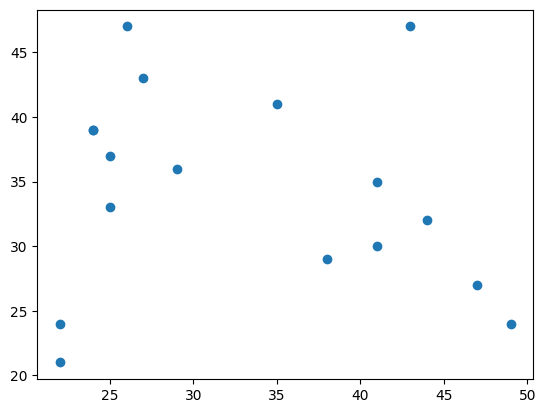

In [6]:
# If we have input arrays of more than five values we get a better
# idea of just how useful it is.
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(low=21, high=50, size=(2,17))
display(B)

h2d_b = np.histogram2d(B[0], B[1], bins=6)
display(h2d_b)

display(real_dm(h2d_b[0]))

plt.Figure(figsize=(6,6))
plt.scatter(x=B[0], y=B[1])


(array([[1., 1., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]]),
 array([22. , 24.7, 27.4, 30.1, 32.8, 35.5, 38.2, 40.9, 43.6, 46.3, 49. ]),
 array([21. , 23.6, 26.2, 28.8, 31.4, 34. , 36.6, 39.2, 41.8, 44.4, 47. ]),
 <matplotlib.collections.QuadMesh at 0x1be613e2b50>)

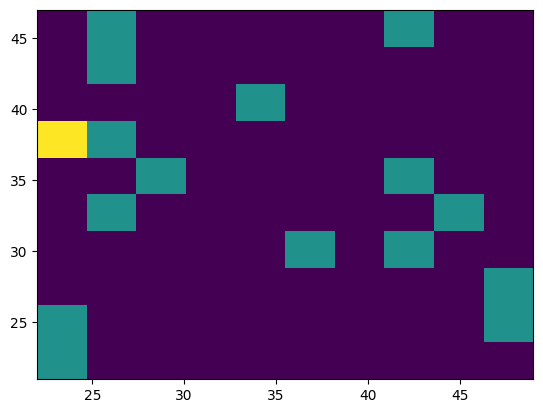

In [7]:
plt.hist2d(x=B[0], y=B[1])

In [8]:
# If row[0] is X coord and row[1] Y coord then all the points are
for i in range(A.shape[1]):
    px, py = A[0,i], A[1,i]
    print(f'Point[{i+1}]_coordinates (x,y): ({px},{py})')

Point[1]_coordinates (x,y): (1,3)
Point[2]_coordinates (x,y): (0,6)
Point[3]_coordinates (x,y): (0,6)
Point[4]_coordinates (x,y): (3,2)
Point[5]_coordinates (x,y): (1,9)


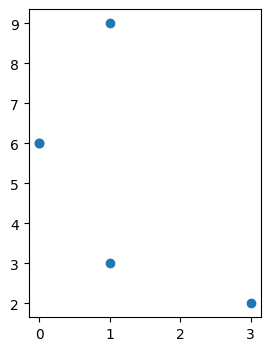

In [9]:

plt.figure(figsize=(3,4))
plt.scatter(x=A[0], y=A[1])

In [10]:
# 2D Histogram: A[0] is X and A[1] is Y
# np.histogram2d(A[0], A[1])) - np.histogram2d(A[0], A[1], bins=4))
# Set the bin size to 4 so the output is more contained 
h2d = np.histogram2d(A[0], A[1], bins=4)
display(h2d)

# Tuple: One 2D array (Density) and two 1D arrays (bins edges on X and on Y)
# There is a slight twist when we look at the density array, the values we see in
# the first row of the density array include all points whose X value falls within
# the first bin. Density Matrix -> DM
# DM ROW -> X bin | DM COLUMN -> Y bin

# The '2.' we see in the third position (DM[0,2]) suggest that there are two
# points which feature in the first bin on the X axis and the third bin on the
# Y axis. 
display(h2d[0][0,2])
# Therefore, we are looking for points that have X coordinates between 0 and 0..75
# and Y coordinates between 5.5 and 7.25. Lopking at matrix A they are: in X the
# two 0 and in Y the two 6
print(f'One point (X=0, Y=6). X A[0,1]: {A[0,1]}, Y A[1,1]: {A[1,1]}')
print(f'Other point (X=0, Y=6). X A[0,2]: {A[0,2]}, Y A[1,2]: {A[1,2]}')

# Hay un pequeño cambio cuando observamos la matriz de densidad, los valores que
# vemos en la primera fila de la matriz de densidad incluyen todos los puntos
# cuyo valor X cae dentro del primer contenedor

(array([[0., 0., 2., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]))

np.float64(2.0)

One point (X=0, Y=6). X A[0,1]: 0, Y A[1,1]: 6
Other point (X=0, Y=6). X A[0,2]: 0, Y A[1,2]: 6


In [11]:
# JM-- DM inverted in rowsorder and transpose is the 2d Histo?
# display(h2d[0])

# I have to make a Function to create a DM_real

# DM_real = h2d[0][::-1]
# DM_real
# display(h2d[0], h2d[0][::-1])
dm_t = h2d[0].T
display(dm_t)
nc1 = dm_t[:,0][::-1]
nc2 = dm_t[:,1][::-1]
nc3 = dm_t[:,2][::-1]
nc4 = dm_t[:,3][::-1]

real_dmj = np.array([nc1, nc2, nc3, nc4]).T

real_dmj

array([[0., 1., 0., 1.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.],
       [0., 1., 0., 0.]])

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

In [12]:
dm = h2d[0]
display(dm)
print(show_attr('dm'))

nf0 = dm[0][::-1]
nf1 = dm[1][::-1]
nf2 = dm[2][::-1]
nf3 = dm[3][::-1]

real_dmk = np.array([nf0, nf1, nf2, nf3]).T
real_dmk

array([[0., 0., 2., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

 dm: | shape: (4, 4) | ndim: 2 | size: 16 | dtype: float64 


array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

In [13]:
dm_f = h2d[0]
display(dm_f)
print(show_attr('dm_f'))

real_dm(dm_f)

array([[0., 0., 2., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

 dm_f: | shape: (4, 4) | ndim: 2 | size: 16 | dtype: float64 


array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

In [14]:
dm_l = h2d[0]
display(dm_l)

dm_real = np.array(list(map(lambda row: row[::-1], dm_l))).T
dm_real

array([[0., 0., 2., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

In [15]:
dm = h2d[0]
display(dm)
print(show_attr('dm'))

nf0 = dm[0][::-1]
nf1 = dm[1][::-1]
nf2 = dm[2][::-1]
nf3 = dm[3][::-1]

dmk = np.ones_like(dm)

dmk[0] = nf0
dmk[1] = nf1
# dmk = np.append(dmk, [nf0])
# dmk = np.append(dmk, [nf1])
# dmk = np.append(dmk, nf2)
# dmk = np.append(dmk, nf3)

display(dmk)

# real_dmk = np.array([nf0, nf1, nf2, nf3]).T
# real_dmk

array([[0., 0., 2., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

 dm: | shape: (4, 4) | ndim: 2 | size: 16 | dtype: float64 


array([[0., 2., 0., 0.],
       [1., 0., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
# To fully comprehend the results of the histogram is better that 
# we first display a sorted version of the flattened array
display(np.sort(A, axis=None))

# And the famous Histogram
h = np.histogram(A)
print(type(h))
print(show_attr('h[0]'))
print(show_attr('h[1]'))
display(h)

display(h[0])   # Num of times the value falls within each bin
display(h[1])   # Depicts the edge of each bin. # bin edges = # bins + 1

array([0, 0, 1, 1, 2, 3, 3, 6, 6, 9])

<class 'tuple'>
 h[0]: | shape: (10,) | ndim: 1 | size: 10 | dtype: int64 
 h[1]: | shape: (11,) | ndim: 1 | size: 11 | dtype: float64 


(array([2, 2, 1, 2, 0, 0, 2, 0, 0, 1]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

array([2, 2, 1, 2, 0, 0, 2, 0, 0, 1])

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [17]:
# Default num of bins = 10, let's try 4
h_bin4 = np.histogram(A, bins=4)
h_bin4

# Fewer bins:  the further away the edges are. The avg num of
# els in each bin has increased

(array([5, 2, 2, 1]), array([0.  , 2.25, 4.5 , 6.75, 9.  ]))

In [18]:
# range= parameter: define a fixed interval of values
# very easy way to ignore outliers
display(np.histogram(A, bins=4, range=(1,7)))

# Warning: a fixed range implies a maximal and minimal value
# which are incorporated for the bins.
display(np.histogram(A, bins=4, range=(1,6.5)))
display(np.histogram(A, bins=4, range=(1,6)))

(array([3, 2, 0, 2]), array([1. , 2.5, 4. , 5.5, 7. ]))

(array([3, 2, 0, 2]), array([1.   , 2.375, 3.75 , 5.125, 6.5  ]))

(array([3, 2, 0, 2]), array([1.  , 2.25, 3.5 , 4.75, 6.  ]))

(array([2., 2., 1., 2., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

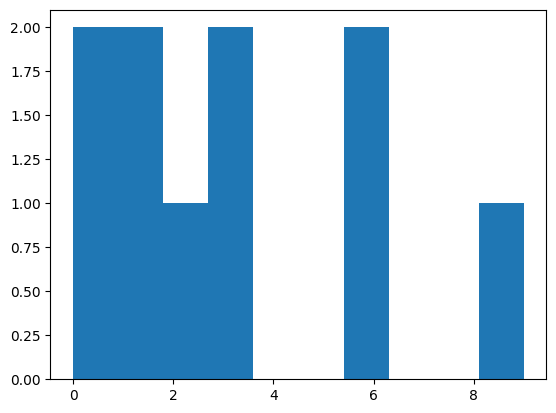

In [19]:
# Plotting the H with matplotlib
import matplotlib.pyplot as plt

plt.hist(A.flat, h[1])

In [20]:
# A.flat? - np.sort()
display(A.flat)
display(np.array(A.flat))
display(np.sort(A, axis=None))

array([1, 0, 0, 3, 1, 3, 6, 6, 2, 9])

array([0, 0, 1, 1, 2, 3, 3, 6, 6, 9])

(array([2., 2., 1., 2., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

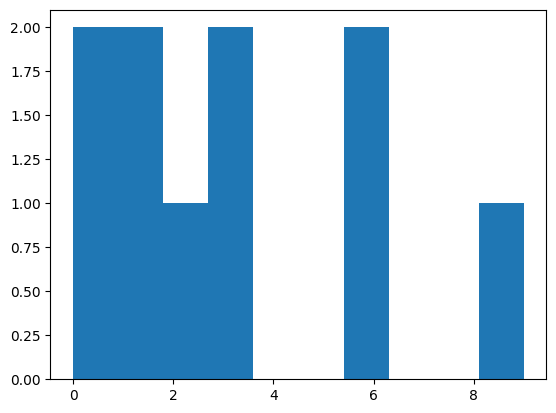

In [21]:
plt.hist(np.sort(A, axis=None), bins=h[1])

(array([5., 2., 2., 1.]),
 array([0.  , 2.25, 4.5 , 6.75, 9.  ]),
 <BarContainer object of 4 artists>)

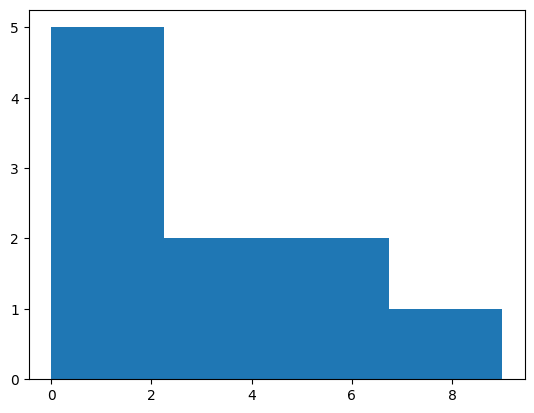

In [22]:
plt.hist(A.flat, bins=h_bin4[1])

In [23]:
import seaborn as sns

sns.histplot(A.flat, bins=h[1])

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
sns.histplot(A.flat, bins=h_bin4[1])

In [ ]:
sns.histplot(np.sort(A, axis=None), bins=h[1])

Histograms

histogram(a[, bins, range, density, weights])
Compute the histogram of a dataset.

histogram2d(x, y[, bins, range, density, ...])
Compute the bi-dimensional histogram of two data samples.

histogramdd(sample[, bins, range, density, ...])
Compute the multidimensional histogram of some data.

bincount(x, /[, weights, minlength])
Count number of occurrences of each value in array of non-negative ints.

histogram_bin_edges(a[, bins, range, weights])
Function to calculate only the edges of the bins used by the histogram function.

digitize(x, bins[, right])
Return the indices of the bins to which each value in input array belongs.

In [ ]:
# Random and biger matric
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(20, size=(4,7))
B

In [ ]:
np.histogram(B)